# 0.0 Libraries

In [35]:
import pandas as pd
import inflection
import math
import calendar
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import Image
import datetime

# 1.0 Data

## 1.1 Functions

## 1.2 Loading Data

In [2]:
#raw data
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False)
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

#joinning/merge
df_store_sales = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

In [3]:
df_store_sales.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
781047,218,3,2013-07-31,6980,912,1,1,0,1,a,c,640.0,NaN,NaN,1,9.0,2011.0,"Mar,Jun,Sept,Dec"
547456,777,3,2014-02-26,3526,317,1,0,0,0,d,c,8250.0,10.0,2004.0,1,10.0,2013.0,"Mar,Jun,Sept,Dec"
611109,875,2,2013-12-31,3161,301,1,0,0,1,d,a,5070.0,11.0,2007.0,1,18.0,2015.0,"Feb,May,Aug,Nov"
929796,672,3,2013-03-20,9244,1465,1,1,0,0,c,a,240.0,9.0,2002.0,0,NaN,NaN,NaN
638901,792,5,2013-12-06,8430,764,1,1,0,0,d,a,17280.0,10.0,2009.0,1,18.0,2011.0,"Feb,May,Aug,Nov"


## 1.3 Data Overview

### 1.3.1 Renaming Columns

In [4]:
df1 = df_store_sales.copy()

In [5]:
cols_old = list(df_store_sales.columns)
snakecase = lambda x: inflection.underscore(x)
#new col names
cols_new = list(map(snakecase, cols_old))
cols_new

['store',
 'day_of_week',
 'date',
 'sales',
 'customers',
 'open',
 'promo',
 'state_holiday',
 'school_holiday',
 'store_type',
 'assortment',
 'competition_distance',
 'competition_open_since_month',
 'competition_open_since_year',
 'promo2',
 'promo2_since_week',
 'promo2_since_year',
 'promo_interval']

In [6]:
df1.columns = cols_new
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

### 1.3.2 Data Dimensions


In [7]:
print('# of rows: {}'.format(df1.shape[0]))
print('# of columns: {}'.format(df1.shape[1]))

# of rows: 1017209
# of columns: 18


### 1.3.3 Data Types

In [8]:
# changing Date from object to date
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

### 1.3.4 Checking NA's

In [9]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### 1.3.5 Filling NA's thinking about the business

In [10]:
df1['competition_distance'].max()

75860.0

In [11]:
# CompetitionDistance - no competition nearby or distance is so high we can ignore it            
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)



In [12]:
# CompetitionOpenSinceMonth - no competition or we don't know the date
# I'm using the same value as the column date to fill this NA (first iteration)    
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1 )



In [13]:
# CompetitionOpenSinceYear     
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1 )



In [14]:
# Promo2SinceWeek - NA = stopped promo  
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)



In [15]:
# Promo2SinceYear    
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)



In [16]:
# PromoInterval - shows the months promo was active
month_map = {}
for m in range(1,13):
    month_map[m] = str(calendar.month_name[m])[0:3] 

df1['promo_interval'].fillna(0, inplace=True)
df1['month_map'] = df1['date'].dt.month.map(month_map)
df1['is_promo'] = df1.apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)
        

In [17]:
df1.sample(5).T

,959112,383167,475556,1011122,375083
store,998,1106,237,603,386
day_of_week,5,1,4,7,2
date,2013-02-22 00:00:00,2014-07-28 00:00:00,2014-05-01 00:00:00,2013-01-06 00:00:00,2014-08-05 00:00:00
sales,3915,7034,0,0,7968
customers,518,652,0,0,619
open,1,1,0,0,1
promo,1,1,1,0,1
state_holiday,0,0,a,a,0
school_holiday,0,1,0,0,1
store_type,a,a,a,a,d


In [18]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

### 1.3.6 Checking data types after df manipulation

In [19]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [20]:
#promo2_since_week and year are floats and can be changed to int
df1['promo2_since_week'] = df1['promo2_since_week'].astype('int64')
df1['promo2_since_year'] = df1['promo2_since_year'].astype('int64')

In [21]:
#competition_since_month and year are floats and can be changed to int
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype('int64')

In [22]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

### 1.3.7 Descriptive Statistics

In [23]:
#grouping columns - numerical and categorical
num_attributes = df1.select_dtypes( include=['int64', 'float64'])
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'])

#### 1.3.7.1 Numerical Attributes

In [24]:
# Central Tendency - mean, median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skw, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max()-x.min())).T #range
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

# concatenating dataframes
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index() #metrics

In [25]:
m.columns = ['attributes', 'min', 'max', 'range', 'neab', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,neab,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


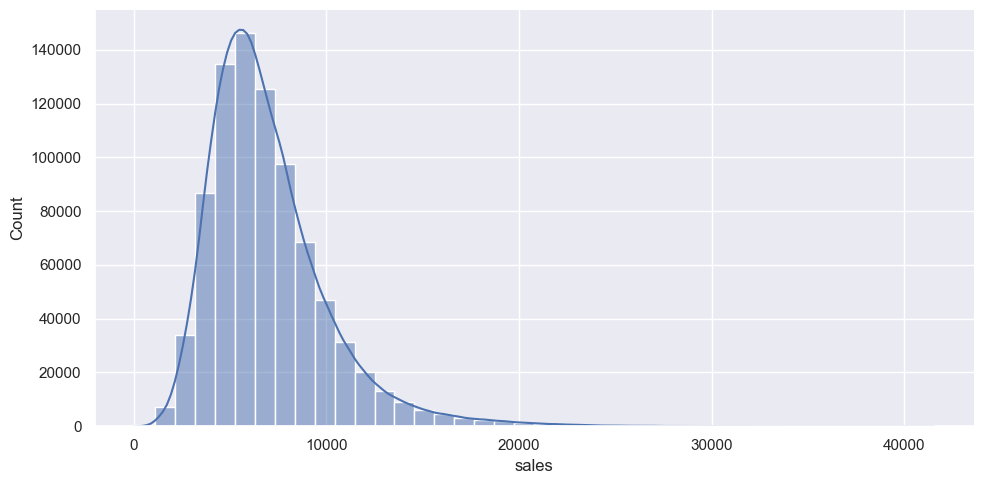

In [26]:
sns.set_theme()
df2 = df1[df1['sales']!=0]
sns.displot(df2['sales'], kde=True, height=5, aspect=2, bins=40);



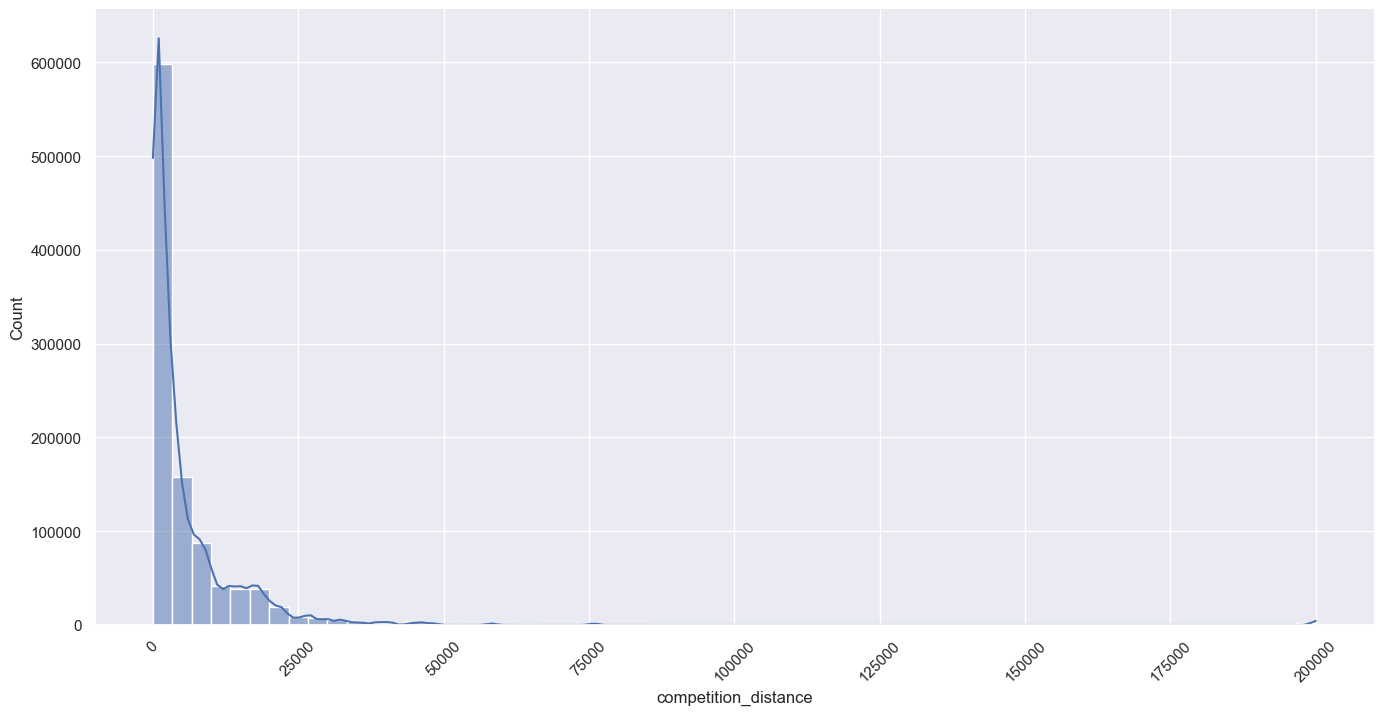

In [27]:
sns.displot(df1['competition_distance'], kde=True, bins=60, height=7, aspect=2)
plt.xticks(rotation=45);

#### 1.3.7.2 Categorical Attributes

In [28]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

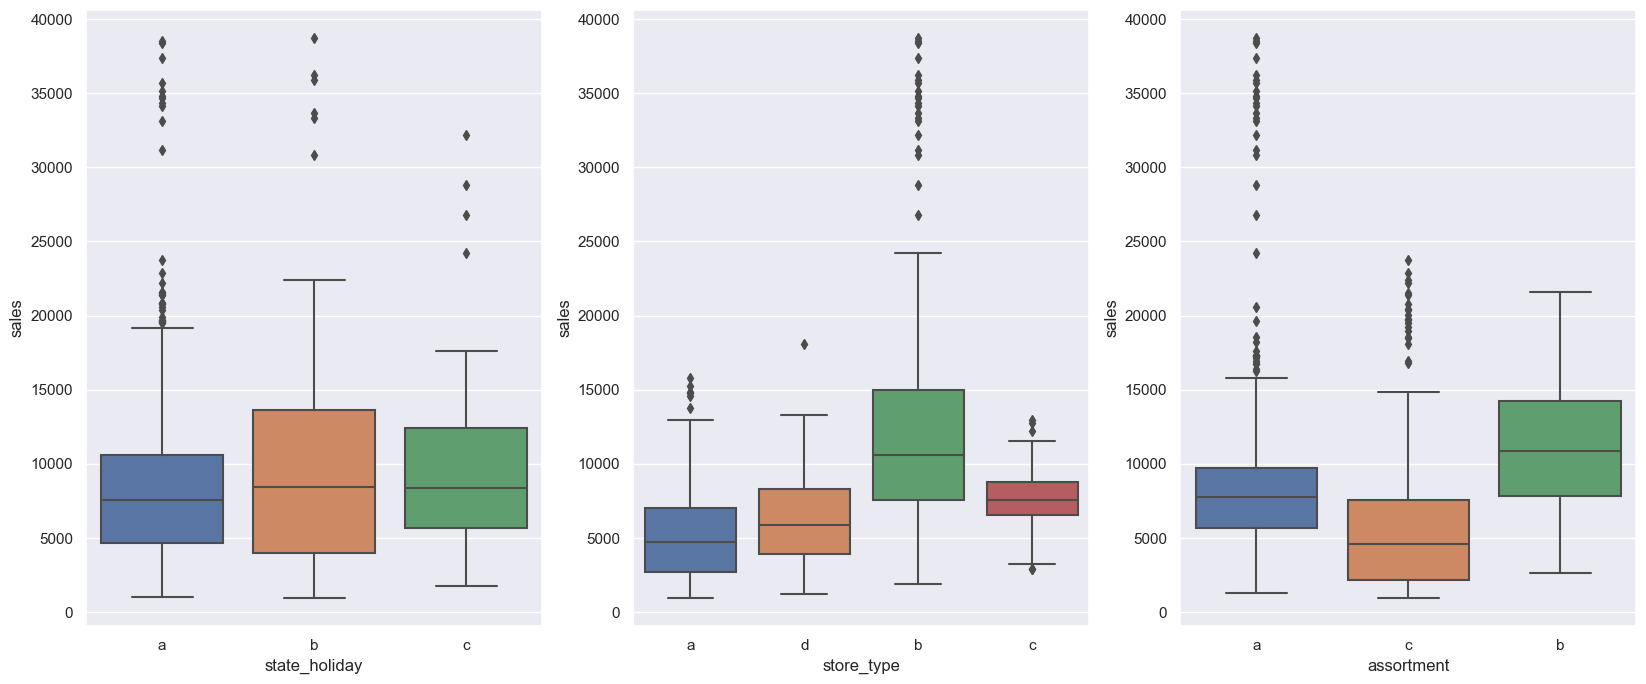

In [29]:
aux1 = df1[(df1['state_holiday']!='0') & (df1['sales']>0)]

plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.boxplot(aux1, x='state_holiday', y='sales')
plt.subplot(1,3,2)
sns.boxplot(aux1, x='store_type', y='sales')
plt.subplot(1,3,3)
sns.boxplot(aux1, x='assortment', y='sales');

# 2.0 Feature Engineering

In [30]:
df2 = df1.copy()

## 2.1 Hypothesis mind map

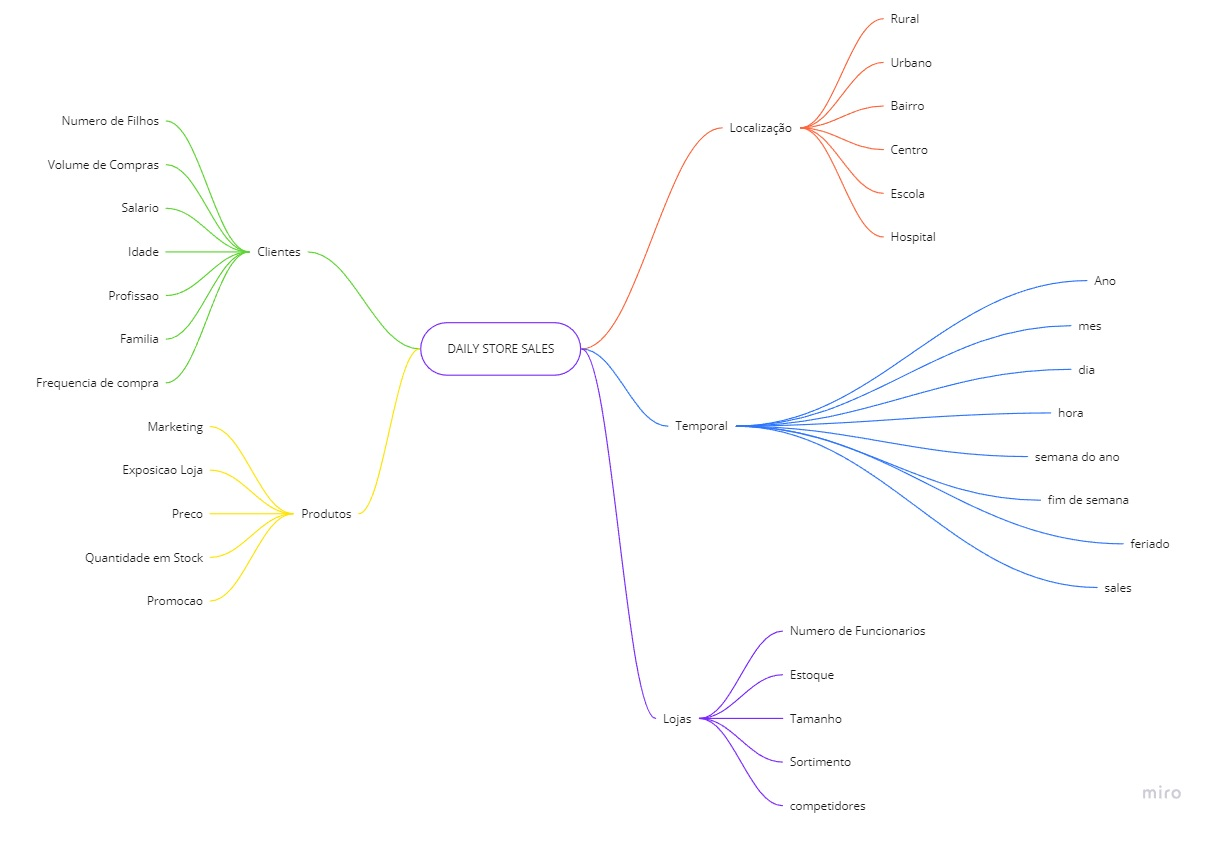

In [31]:
#mindmap coggle/miro
Image('img/mind_map.jpg')

## 2.2 Hypothesis lists

In [32]:
#hipoteses - relacionar cada atributo com a variável resposta (daily sales) para encontar uma correlação

### 2.2.1 Store Hypothesis

**1.** Lojas com maior quadro de funcionarios deveriam vender mais.\
**2.** Lojas com maior estoque deveriam vender mais.\
**3.** Lojas com maior porte deveriam vender mais.\
**4.** Lojas com maior sortimento deveriam vender mais.\
**5.** Lojas com competidores mais próximos deveriam vender menos.\
**6.** Lojas com competidores à mais tempo deveriam vender mais.

### 2.2.2 Product Hypothesis

**1.** Lojas que investem mais me marketing deveriam vender mais.\
**2.** Lojas com maior exposição dos produtos deveriam vender mais.\
**3.** Lojas que tem preços menores nos produtos deveriam vender mais.\
**4.** Lojas com promoções mais agressivas deveriam vender mais.\
**5.** Lojas com promoções ativas por mais tempo deveriam vender mais.\
**6.** Lojas com mais dias de promoção deveriam vender mais.\
**7.** Lojas com mais promoções consecutivas deveriam vender mais.\

### 2.2.3 Time Hypothesis

**1.** Lojas baertas durante o feriado de Natal deveriam vender mais.\
**2.** Lojas deveriam vender mais ao longo dos anos.\
**3.** Lojas deveriam vender mais no segundo semestre do ano.\
**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.\
**5.** Lojas deveriam vender menos aos finais de semana.\
**6.** Lojas deveriam vender menos durante os feriados escolares.

### 2.2.4 Hypothesis list

In [33]:
#priorizar as hipoteses que vão ser utilizadas na analise exploratoria
#escolher as hipoteses que já temos os dados primeiro

**1.** Lojas com maior sortimento deveriam vender mais.\
**2.** Lojas com competidores mais próximos deveriam vender menos.\
**3.** Lojas com competidores à mais tempo deveriam vender mais.\
**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.\
**5.** Lojas com mais dias de promoção deveriam vender mais.\
**6.** Lojas com mais promoções consecutivas deveriam vender mais.\
**7.** Lojas baertas durante o feriado de Natal deveriam vender mais.\
**8.** Lojas deveriam vender mais ao longo dos anos.\
**9.** Lojas deveriam vender mais no segundo semestre do ano.\
**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.\
**11.** Lojas deveriam vender menos aos finais de semana.\
**12.** Lojas deveriam vender menos durante os feriados escolares.

## 2.3 Feature Engineering

In [47]:
# year
df2['year'] = df2['date'].dt.year
# month
df2['month'] = df2['date'].dt.month
# day
df2['day'] = df2['date'].dt.day
# week of year
df2['week'] = df2['date'].dt.isocalendar().week
# year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

# competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'], day=1), axis=1)
df2['competition_time_months'] = ((df2['date'] - df2['competition_since'])/30).apply(lambda x: x.days).astype(int)
# promo since - without month and day, join week and year to get a date
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + "-1", '%Y-%W-%w') - datetime.timedelta(days=7))
df2['promo_time_weeks'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)

# assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')
# state holiday
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christimas' if x == 'c' else 'regular_day')


In [48]:
df2.sample(5).T

,871092,115875,598337,826818,41523
store,1063,1031,368,274,269
day_of_week,7,7,6,4,3
date,2013-05-12 00:00:00,2015-04-19 00:00:00,2014-01-11 00:00:00,2013-06-20 00:00:00,2015-06-24 00:00:00
sales,0,0,8229,3781,7049
customers,0,0,668,1016,1039
open,0,0,1,1,1
promo,0,0,0,1,0
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,0,0,0,0,0
store_type,a,d,d,b,a
